In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
from colicoords import Cell, load, CellPlot, iter_subplots, IterCellPlot, CellListPlot
from colicoords.support import pad_cell
from colicoords.config import cfg
import tifffile
import os

In [ ]:
data_dir = r'.'

In [ ]:
cy3b = load(os.path.join(data_dir, 'Cy3B_NHS', 'cells_final.hdf5'))
egfp = load(os.path.join(data_dir, 'eGFP', 'cells_final.hdf5'))
len(cy3b), len(egfp)

In [4]:
cy3b_cell = cy3b[522]
egfp_cell = egfp[30]

shapes = np.array([c.data.shape for c in [cy3b_cell, egfp_cell]])
shapes_max = shapes.T.max(axis=1)
cy3b_pad = pad_cell(cy3b_cell, shapes_max)
egfp_pad = pad_cell(egfp_cell, shapes_max)

In [5]:
cy3b_aligned = tifffile.imread(os.path.join(data_dir, 'Cy3B_aligned.tif'))
egfp_aligned = tifffile.imread(os.path.join(data_dir, 'eGFP_aligned.tif'))

In [6]:
import seaborn as sns
sns.set_style('ticks')

<IPython.core.display.Javascript object>


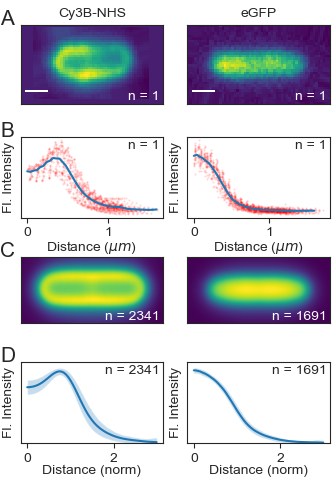

In [15]:
fig_width = 8.53534 / 2.54
fig, axes = plt.subplots(4, 2, figsize=(fig_width, 4.8))
labelsize = 10

for ax in axes[0::2].flatten():
    ax.tick_params(axis='x', labelbottom=False)
    ax.tick_params(axis='y', labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])

    
for ax in axes[1::2].flatten():
    ax.tick_params(axis='y', labelleft=False)
    ax.set_yticks([])

sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0})

cp_cy3b_pad = CellPlot(cy3b_pad)
cp_cy3b_pad.imshow('fluorescence', ax=axes[0,0])
sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0},
             label_formatter=lambda x, y: None, height_fraction=0.02)
axes[0, 0].add_artist(sb)
axes[0, 0].set_title('Cy3B-NHS', fontsize=labelsize)
axes[0, 0].text(0.975, 0.05, 'n = {}'.format(1), transform=axes[0, 0].transAxes, horizontalalignment='right',
               color='w')

cp_egfp_pad = CellPlot(egfp_pad)
cp_egfp_pad.imshow('fluorescence', ax=axes[0,1])
sb = ScaleBar(80/1000, 'um', location='lower left', frameon=False, color='w', font_properties={'size': 0}, 
              label_formatter=lambda x, y: None, height_fraction=0.02)
axes[0, 1].add_artist(sb)
axes[0, 1].set_title('eGFP', fontsize=labelsize)
axes[0, 1].text(0.975, 0.05, 'n = {}'.format(1), transform=axes[0, 1].transAxes, horizontalalignment='right',
               color='w')


cp_cy3b = CellPlot(cy3b_cell)
cp_cy3b.plot_r_dist(ax=axes[1, 0])
axes[1, 0].plot(cy3b_cell.coords.rc.flatten() * cfg.IMG_PIXELSIZE / 1000, cy3b_cell.data.data_dict['fluorescence'].flatten(),
               'r.', alpha=0.15, markersize=1, zorder=-1)
axes[1, 0].xaxis.labelpad = 0
axes[1, 0].xaxis.label.set_size(labelsize)
axes[1, 0].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 0].text(0.975, 0.85, 'n = {}'.format(1), transform=axes[1, 0].transAxes, horizontalalignment='right')


cp_egfp = CellPlot(egfp_cell)
cp_egfp.plot_r_dist(ax=axes[1, 1])
axes[1, 1].plot(egfp_cell.coords.rc.flatten() * cfg.IMG_PIXELSIZE / 1000, egfp_cell.data.data_dict['fluorescence'].flatten(),
               'r.', alpha=0.15, markersize=1, zorder=-1)
axes[1, 1].xaxis.labelpad = 0
axes[1, 1].xaxis.label.set_size(labelsize)
axes[1, 1].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[1, 1].text(0.975, 0.85, 'n = {}'.format(1), transform=axes[1, 1].transAxes, horizontalalignment='right')


axes[2, 0].imshow(cy3b_aligned, cmap='viridis', interpolation='spline16')
axes[2, 0].text(0.975, 0.05, 'n = {}'.format(len(cy3b)), transform=axes[2, 0].transAxes, horizontalalignment='right',
               color='w')

axes[2, 1].imshow(egfp_aligned, cmap='viridis', interpolation='spline16')
axes[2, 1].text(0.975, 0.05, 'n = {}'.format(len(egfp)), transform=axes[2, 1].transAxes, horizontalalignment='right',
               color='w')


clp_cy3b = CellListPlot(cy3b)
clp_cy3b.plot_r_dist(ax=axes[3, 0], norm_x=True, norm_y=True, stop=3, zero=True)
axes[3, 0].xaxis.labelpad = 0
axes[3, 0].xaxis.label.set_size(labelsize)
axes[3, 0].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[3, 0].set_title('')
axes[3, 0].text(0.975, 0.85, 'n = {}'.format(len(cy3b)), transform=axes[3, 0].transAxes, horizontalalignment='right')


clp_egfp = CellListPlot(egfp)
clp_egfp.plot_r_dist(ax=axes[3, 1], norm_x=True, norm_y=True, stop=3, zero=True)
axes[3, 1].xaxis.labelpad = 0
axes[3, 1].xaxis.label.set_size(labelsize)
axes[3, 1].set_ylabel('Fl. Intensity', fontsize=labelsize)
axes[3, 1].set_title('')
axes[3, 1].text(0.975, 0.85, 'n = {}'.format(len(egfp)), transform=axes[3, 1].transAxes, horizontalalignment='right')
plt.tight_layout(pad=0.2)
plt.subplots_adjust(top=0.95)


p0 = axes[0, 0].get_position()
fig.text(0.0, p0.y0 + p0.height, 'A', fontsize=15)


p0 = axes[1, 0].get_position()
fig.text(0.0, p0.y0 + p0.height, 'B', fontsize=15)

p0 = axes[2, 0].get_position()
fig.text(0.0, p0.y0 + p0.height, 'C', fontsize=15)

p0 = axes[3, 0].get_position()
fig.text(0.0, p0.y0 + p0.height, 'D', fontsize=15)

plt.savefig('Figure_6.pdf', dpi=1000)